In [22]:
import pickle 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

plt.rcParams['font.family'] = 'serif'

from pathlib import Path

In [23]:
pickle_path = Path.home() / "mulab/main/sagittarius_A/pickle/slope_df.pickle" 

In [24]:
with open(pickle_path, "rb") as f: 
    res = pickle.load(f) 

res

,disc,f1,f2,f3,slope,slope_err,intercept,radii
0,0,F115W,F212N,F115W,1.487712,0.012378,11.830985,"(0.0, 0.0102634518037135)"
1,1,F115W,F212N,F115W,1.488984,0.031676,11.807640,"(0.0102634518037135, 0.014514712737574237)"
2,2,F115W,F212N,F115W,1.460802,0.019806,12.034933,"(0.014514712737574237, 0.01777681998506622)"
3,3,F115W,F212N,F115W,1.474138,0.012954,11.945099,"(0.01777681998506622, 0.020526903607427)"
4,4,F115W,F212N,F115W,1.501569,0.045275,11.783815,"(0.020526903607427, 0.022949775916896214)"
5,5,F115W,F212N,F115W,1.460049,0.020095,12.098665,"(0.022949775916896214, 0.03555363997013244)"


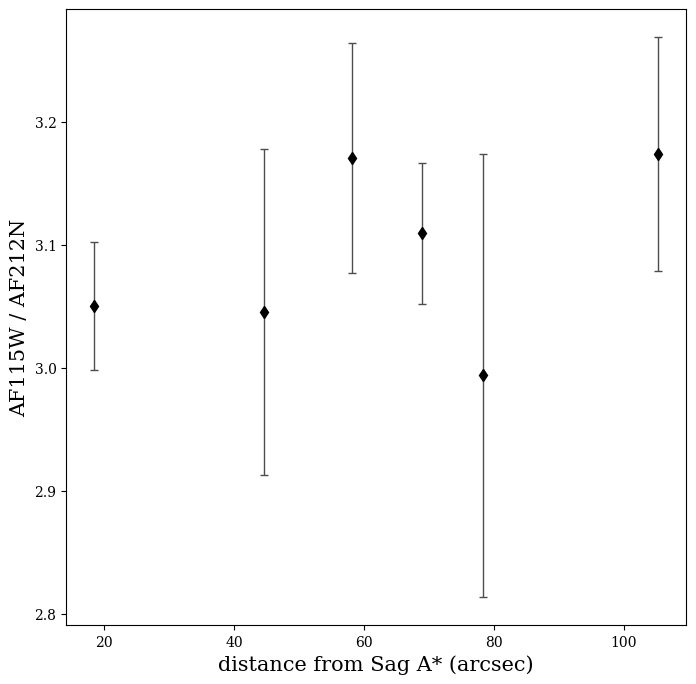

In [28]:
r0 = np.array([p[0] for p in res["radii"]], dtype=float)
r1 = np.array([p[1] for p in res["radii"]], dtype=float)
r_mid = (r0 + r1) / 2.0

slope = res["slope"].to_numpy(dtype=float)
slope_err = res["slope_err"].to_numpy(dtype=float)

ratio = slope / (slope - 1.0)
ratio_err = np.abs(slope_err) / np.square(slope - 1.0)

fig, ax = plt.subplots(figsize=(8, 8))
ax.errorbar(
    r_mid * 3600, ratio,
    yerr=ratio_err,
    fmt='d', ms=6, color='k', ecolor='0.3',
    capsize=3, elinewidth=1
)

ax.set_xlabel("distance from Sag A* (arcsec)", fontsize=15)
ax.set_ylabel("AF115W / AF212N", fontsize=15)
plt.show()